# Homework 3: 

# Theory 
## Questions 
- Why apply a logarithm on the likelihood?  
- What are analytical reasons?  
- What are numerical reasons?  
- Does it affect the estimator?  

## Task 1
We observe an experiment $D=\{x_1,\cdots, x_n\}$ with i.i.d. $x_i \sim p(x_i|\mu,\sigma^2) = \dfrac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$.
What is the MLE for $\mu$ and $\sigma^2$ ?

## Task 2
We observe am experiment $D=\{(x_1,y_1),\cdots, (x_n,y_n)\}$. We assume a linear model with Gaussian noise: $y_i = x_i\cdot a + b + \epsilon_i$  with i.i.d. $\epsilon_i \sim \mathcal{N}(0,\sigma^2)$.
       What is the MLE for $a,b$ and $\sigma^2$ ?

## Task 3
Assume we have a Bernoulli process, where we toss a coin multiple times.  
Let $D = (x_1, x_2, . . . , x_7) = (0, 0, 1, 1, 0, 0, 1)$ be the measurements. 
Assume $p(x_i|\theta)=
\begin{cases}
\theta  & \text{if} ~ x_i=1 ~ (head),\\
1-\theta ~ &\text{if} ~ x_i=0 ~ (tail)
\end{cases}$

- Let $p(\theta)=\mathcal{N}(0.5,0.1)$. What is the MAP estimator $\theta_{MAP}$? What is the probability of tossing tails two times $P(x_8=0, x_9=0|\theta_{MAP})$
- Let $p(\theta)=\mathcal{U}(0,1)$. What is the probability of the next toss to be head $P(x_8=1|D)$ 


1. Why apply a logarithm on the likelihood?

Applying a logarithm to the likelihood function is a common practice in statistical inference. The primary reasons for doing so are:

Simplifying calculations and improving numerical stability.
Converting products of probabilities into sums.
Preserving the order of probabilities, ensuring that maximizing the logarithm of the likelihood is equivalent to maximizing the likelihood itself.
2. What are analytical reasons?

Analytically, taking the logarithm of the likelihood function:

Preserves the mathematical properties of the problem.
Does not alter the solutions or the estimator.
Enables working with simpler expressions and facilitating mathematical manipulation.
3. What are numerical reasons?

Numerically, taking the logarithm of the likelihood function:

Improves the stability of computations by avoiding numerical underflow.
Converts products of small probabilities closer to zero into sums, which are more computationally robust.
Helps optimization algorithms converge faster and estimate more reliably.
4. Does it affect the estimator?

No, taking the logarithm of the likelihood function does not affect the properties of the maximum likelihood estimator (MLE). The MLE is obtained by maximizing the likelihood function, and maximizing the log-likelihood function yields the same result. The estimator remains unaffected; only the computational aspects change.

# Praxis

The goal of the exercise is to implement a Maximum Likelihood Estimator for a normal distribution.  
We create $n$ data samples from a 2D normal distribution $X_i \sim \mathcal{N}(\mu, \Sigma)$

We would like to estimate the mean $mu$ using a numerical appraoch with gradient ascent.

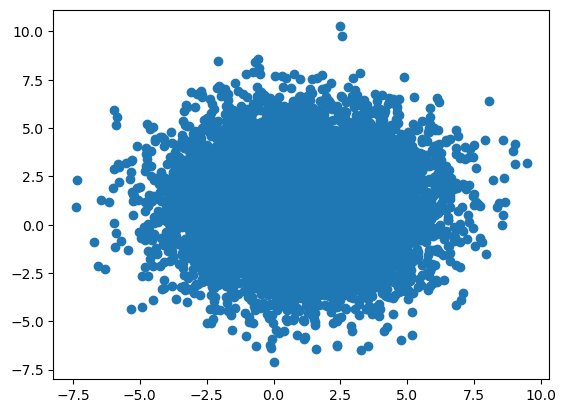

In [1]:
import numpy as np 
import torch
import matplotlib.pyplot as plt

n = 10000 # number of samples (descrease the number if computations take too much time)
mu, sigma = np.ones(2), 5*np.eye(2) # mean and standard deviation of ground truth distribution
data = np.random.multivariate_normal(mu, sigma, n) # sample n data points from the distribution
plt.scatter(data[:,0],data[:,1])
plt.show()


# Maximum Likelihood

The likelihood of a single data point is given as:  
$$p(x; \mu, \Sigma) = \dfrac{1}{\sqrt{|\Sigma|(2\pi)^2}} 
  \exp\left( -\frac{1}{2}(x-\mu)\Sigma^{-1}(x-\mu)^T \right)$$

The log-likelihood is:
$$\log (p(x; \mu, \Sigma)) =-\frac{1}{2}(x-\mu)\Sigma^{-1}(x-\mu)^T  + C $$

The joint likelihood over the whole data is:  
$$p(D;\mu, \Sigma) = \prod_i^n p(x_i; \mu, \Sigma)$$

We would like to find $\mu$ that has the highest likelihood for the given data. We assume for now, that $\Sigma$ is known:
$$ \max_\mu  p(D;\mu, \Sigma) $$
This is equivalent to maximizing the log-likelihood:
$$\Leftrightarrow  \max_\mu L(\mu) := \log (p(D;\mu, \Sigma))$$ 

Since $L(\mu)$ is a differentiable function, we can try to find the maximum using gradient ascent to find the local maximum.  
We can utilize Pytorch automatic differentiation to compute the gradients for us.  

Given are two heper functions:
1. the log-likelihood $L(\mu)$ for a given dataset
2. a visualization of the log-likelihood over a range $[-5,5]\times [-5,5]$ as a heatmap.

In [2]:
def L(X, mu, sigma):
    """ 
    Computes the log-likelihood over a dataset X for an estimated normal distribution parametrized 
    by mean mu and covariance sigma

    X : Tensor 
        A data matrix of size n x 2 
    mu: Tensor of size 2
        a tensor with two entries describing the mean
    sigma: Tensor of size 2x2
        covariance matrix
    """
    diff = X-mu
    z = -0.5*diff@sigma.inverse()*diff
    return z.sum()

def vizualize(X, mus, sigma):
    """ 
    Plots a heatmap of a likelihood evaluated for different mu.
    It also plots a list of gradient updates. 

    X : Tensor 
        A data matrix of size n x 2 
    mus: list[Tensor]  
        A list of 2D tensors. The tensors should be detached from and on CPU.
    sigma: Tensor of size 2x2
        covariance matrix
    """
    loss = lambda x,y: L(X,torch.tensor([x,y]),sigma)
    loss = np.vectorize(loss)
    space = np.linspace(-5,5,100)
    x,y  = np.meshgrid(space,space)
    zs = np.array(loss(np.ravel(x), np.ravel(y)))
    z = zs.reshape(x.shape)
    plt.pcolormesh(x,y, z )

    mu_x, mu_y = zip(*mus)
    plt.plot(mu_x, mu_y)
    plt.xlim([-5,5])
    plt.ylim([-5,5])
    plt.show()


### Example Use of functions:

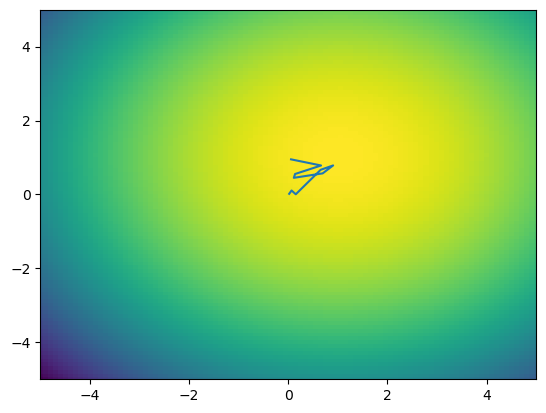

In [3]:
mu = torch.tensor([0.0,0.0],dtype=torch.float64, requires_grad=True) # 2D vector
sigma =  torch.tensor(sigma,dtype=torch.float64) # 2D convariance matrix
X = torch.tensor(data,dtype=torch.float64)  # data samples as tensor

loss = L(X,mu, sigma)  # computing loss
loss.backward()  # backpropagation
mu.grad  # gradients are stored in the object


mus = [torch.rand(2) for _ in range(10)] # a list 2D mu updates (dont)
vizualize(X,mus,sigma) 

## Task 1 : MLE using gradient ascent

Find the maximum by computing gradient ascent:
$$ \mu_{t+1} = \mu_{t} + \lambda \dfrac{d}{d \mu}L(\mu) $$

1. Implement a function that does the following steps:
    - initialize $\mu_0 = (0,0)^T$
    - compute Likelihood $L(\mu)$ 
    - calculate gradient $\dfrac{d}{d \mu}L(\mu) $ using Pytorch's automatic differentiation
    - update $\mu$
    - repeat until convergence or after certain amount of steps 
2. Visualize your gradient updates
3. How does the learning rate $\lambda$ affect convergence?

## Task 2: Better Gradient Updates

1. Change your vanilla gradient updates to a more sophisticated approach.  You can use any of Pytorch's optimization methods:  https://pytorch.org/docs/stable/optim.html
2. Visualize the new gradient updates
3. How and why do these methods differ?

## Task 3: Stochastic Gradients

Instead of optimizing over all data points
$$\max_\mu L(\mu) = \log (p(D;\mu, \Sigma))$$ 

take smaller random subsets $\hat{D} \subset D$ and optimize over approximation:
    $$\max_\mu \hat{D}(\mu) = \log (p(\hat{D};\mu, \Sigma))$$ 

1. Change your optimization method by taking random subsets of $\hat{D} \subset D$ in each iteration. 
    - How does the size $k:=|\hat{D}|$ affect convergence?
2. Visualize the log-likelihood over the whole data and for smaller subsets $k \in \{1, 5, 10, 100, 1000, ...\}$
    - What conclusions can you make?